 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [38]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [39]:
# Reading whale returns
whale_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [40]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [41]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [42]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [43]:
# Reading algorithmic returns
algo_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [44]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [45]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [46]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [47]:
# Reading S&P 500 Closing Prices
sp500_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [48]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [49]:
# Fix Data Types - Close
# YOUR CODE HERE
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [50]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [51]:
# Drop nulls
# YOUR CODE HERE
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [52]:
# Rename Column
# YOUR CODE HERE
sp500_returns = sp500_returns.rename(columns = {"Close":"S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [53]:
# Concatenate all DataFrames into a single DataFrame

# YOUR CODE HERE
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis='columns', join='inner')
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 
### Answer
Algo 1 and Berkshire have higher cumulative returns than S&P 500.

<AxesSubplot:xlabel='Date'>

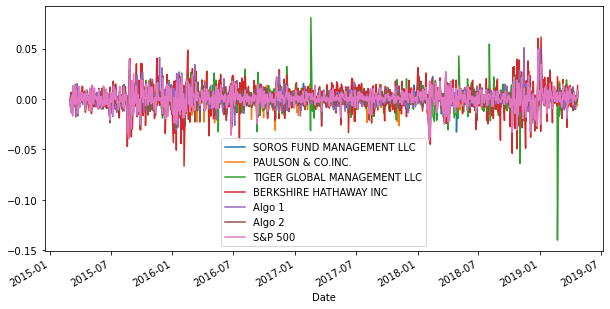

In [54]:
# Plot daily returns
# YOUR CODE HERE
combined_returns.plot(figsize=(10,5))

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

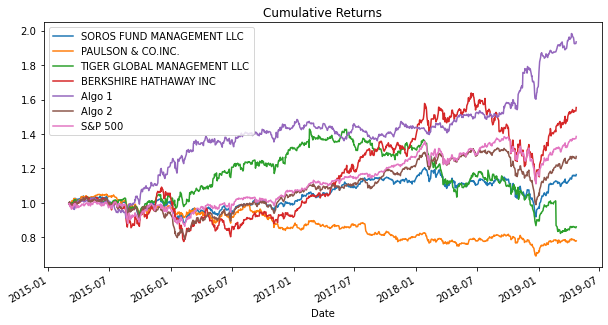

In [55]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot(figsize=(10,5), title = "Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

## Answer
Berkshire Hathaway Inc. and Tiger Global Management LLC show greater volatility some days.

<AxesSubplot:title={'center':'Risk'}>

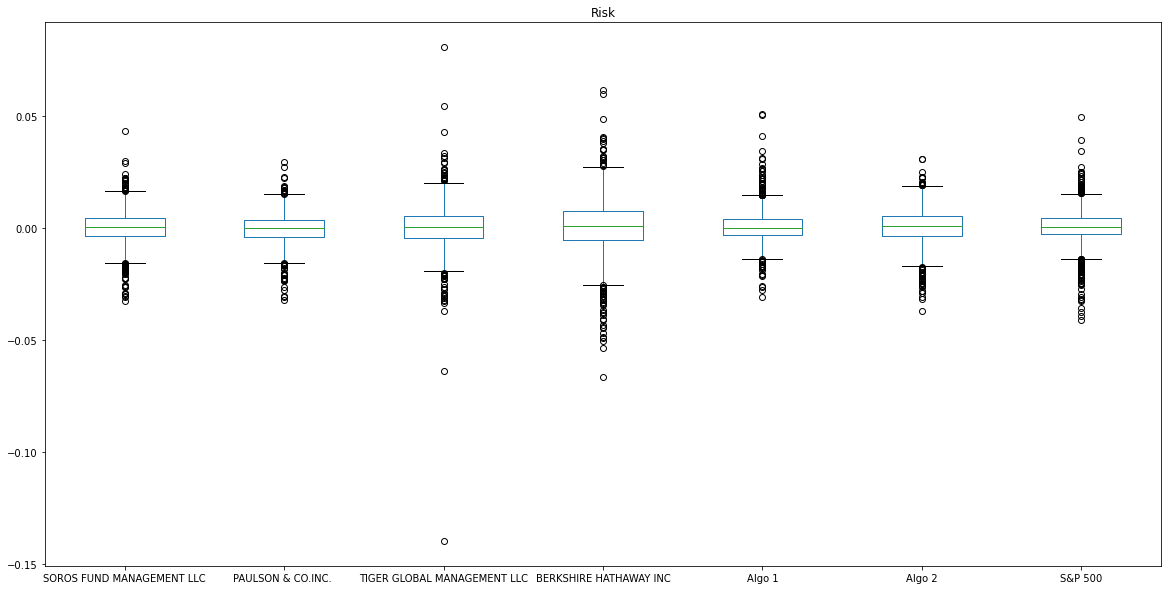

In [56]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_returns.plot.box(figsize=(20,10), title = "Risk")

In [57]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# YOUR CODE HERE
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [58]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp500 = combined_returns["S&P 500"].std()
sp500 < combined_returns.std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [59]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

## Answer
Does the risk increase for each of the portfolios at the same time risk increases in the S&P? 
Not for all of them - Berkshire and Tiger don't sometimes.


Which returns most closely mimic the S&P?
Algo2 and Soros


Does the portfolio seem sensitive to movements in the S&P 500? Yes (Cumulative Returns)

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

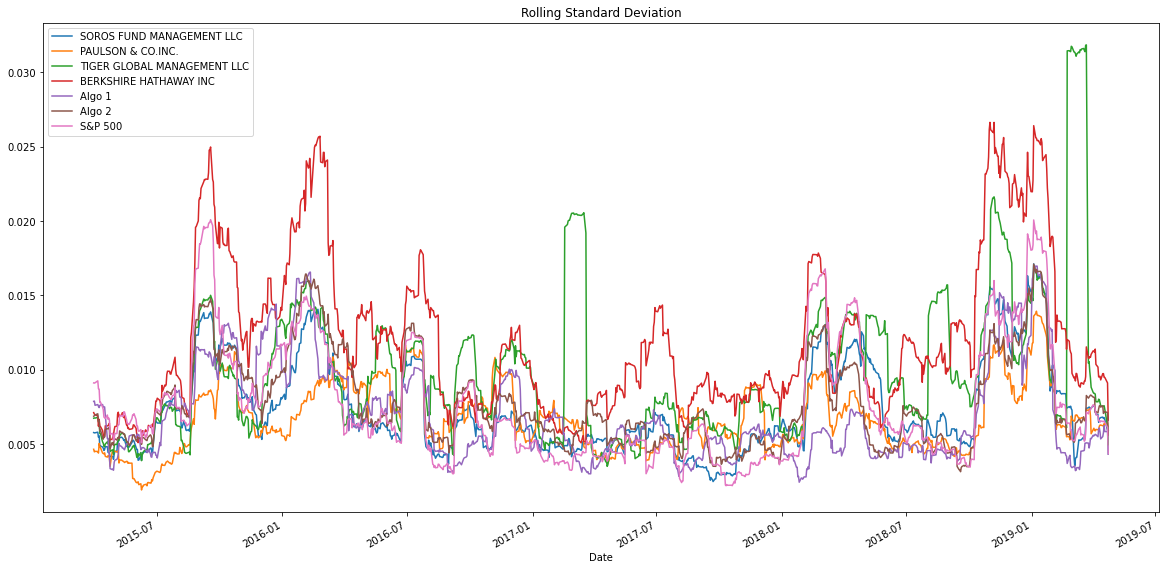

In [60]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_returns.rolling(window = 21).std().plot(figsize=(20,10), title = "Rolling Standard Deviation")

In [61]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

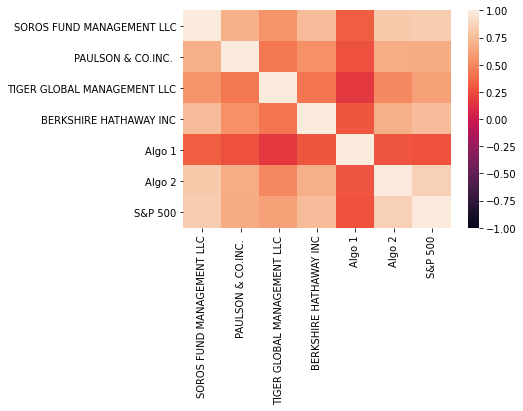

In [62]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

In [63]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
algo_SP500 = pd.concat([algo_returns_df, sp500_returns], axis='columns', join='inner')
algo_SP500 = algo_SP500.drop(columns = ['Algo 1'])
covariance = algo_SP500['Algo 2'].cov(algo_SP500['S&P 500'])
variance = algo_SP500['S&P 500'].var()
Algo2_beta = covariance / variance
Algo2_beta

0.8288272638052225

<AxesSubplot:title={'center':'Rolling 30 Day Beta of Algo 2'}, xlabel='Date'>

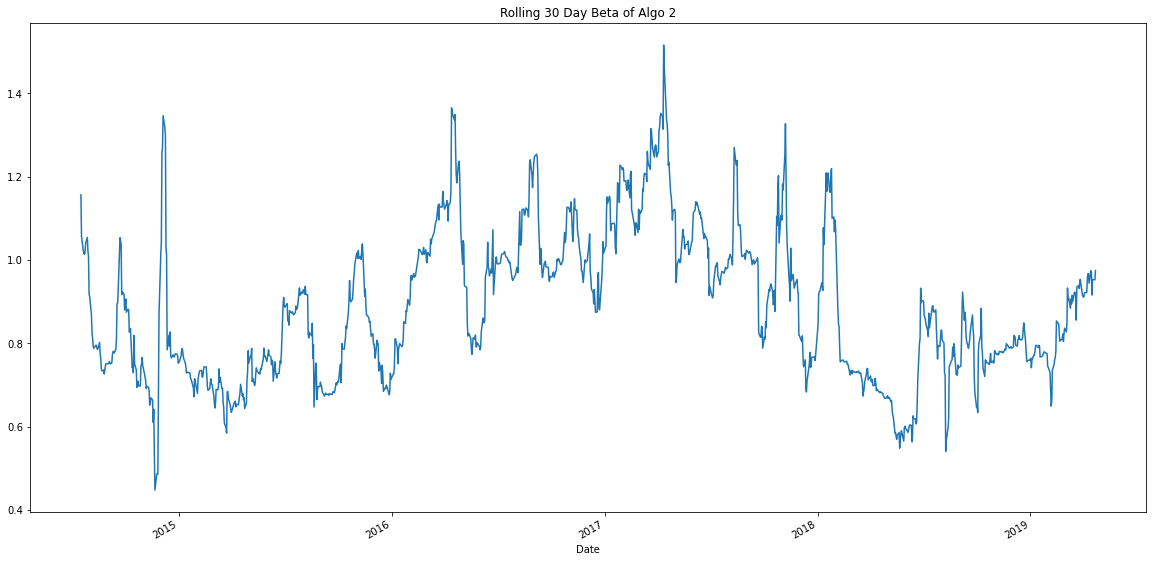

In [64]:
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
rolling_covariance = algo_SP500['Algo 2'].rolling(window = 30).cov(algo_SP500['S&P 500'])
rolling_variance = algo_SP500['S&P 500'].rolling(window = 30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize = (20, 10), title = "Rolling 30 Day Beta of Algo 2")

<AxesSubplot:title={'center':'Eponentially Weighted Moving Average'}, xlabel='Date'>

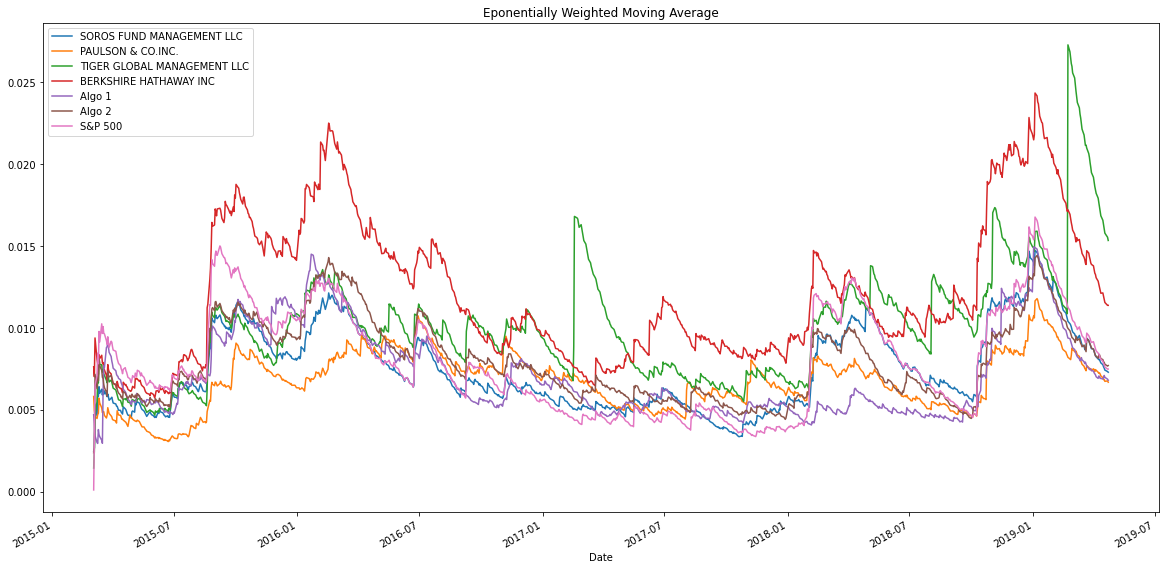

In [65]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_returns.ewm(halflife=21).std().plot(figsize=(20,10), title = "Eponentially Weighted Moving Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

## Answer
Yes, Algo 1 does but Algo 2 does not.

In [66]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

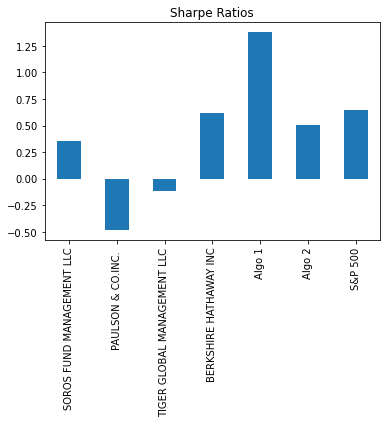

In [67]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 
 
 ## Answer

According to the daily standard deviation, my custom portfolio is one of the top three most volatile with Tiger and Berkshire Hathaway. My custom portfolio is not the most competitive but still has a good return for the risk.


## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [68]:
# Read the first stock
target_csv = Path("../Resources/Target.csv")
# YOUR CODE HERE
target_df = pd.read_csv(target_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
target_df = target_df.rename(columns = {"Close":"TGT"})
target_returns = target_df.pct_change()
target_returns.head()

,TGT
Date,
2019-01-02,NaN
2019-01-03,-0.013697
2019-01-04,0.013734
2019-01-07,0.048924
2019-01-08,-0.001005


In [69]:
# Drop Nulls
target_returns = target_returns.dropna()
target_returns.isnull().sum()

TGT    0
dtype: int64

In [70]:
# Read the second stock
toyota_csv = Path("../Resources/Toyota.csv")
# YOUR CODE HERE
toyota_df = pd.read_csv(toyota_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
toyota_df = toyota_df.rename(columns = {"Close":"TM"})
toyota_returns = toyota_df.pct_change()
toyota_returns.head()

,TM
Date,
2019-01-02,NaN
2019-01-03,-0.014018
2019-01-04,0.044309
2019-01-07,0.012946
2019-01-08,0.008493


In [71]:
# Drop Nulls
toyota_returns = toyota_returns.dropna()
toyota_returns.isnull().sum()

TM    0
dtype: int64

In [72]:
# Read the fourth stock
apple_csv = Path("../Resources/Apple.csv")
# YOUR CODE HERE
apple_df = pd.read_csv(apple_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
apple_df = apple_df.rename(columns = {"Close":"AAPL"})
apple_returns = apple_df.pct_change()
apple_returns.head()

,AAPL
Date,
2019-01-02,NaN
2019-01-03,-0.099544
2019-01-04,0.042757
2019-01-07,-0.002428
2019-01-08,0.019200


In [73]:
# Drop Nulls
apple_returns = apple_returns.dropna()
apple_returns.isnull().sum()

AAPL    0
dtype: int64

In [74]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_returns = pd.concat([target_returns, toyota_returns, apple_returns], axis='columns', join='inner')
all_returns

,TGT,TM,AAPL
Date,,,
2019-01-03,-0.013697,-0.014018,-0.099544
2019-01-04,0.013734,0.044309,0.042757
2019-01-07,0.048924,0.012946,-0.002428
2019-01-08,-0.001005,0.008493,0.019200
2019-01-09,0.009769,0.004987,0.016981
...,...,...,...
2020-09-28,0.013670,0.022862,0.023869
2020-09-29,0.003068,-0.012940,-0.007568
2020-09-30,0.003058,-0.013482,0.015076


In [75]:
# Reset the index
# YOUR CODE HERE
# see above (already set)

In [76]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
# see above (already set)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [77]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_portfolio = all_returns.dot(weights)
my_portfolio.head()

Date
2019-01-03   -0.042420
2019-01-04    0.033600
2019-01-07    0.019814
2019-01-08    0.008896
2019-01-09    0.010579
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [78]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
custom_portfolio = pd.concat([combined_returns, my_portfolio], axis='columns', join='inner')
custom_portfolio = custom_portfolio.rename(columns = {0: 'My Portfolio'})
custom_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.042420
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.033600
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.019814
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.008896
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098,0.010579
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000642
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.015758
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.006487


In [79]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
custom_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
My Portfolio                   0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [80]:
# Risk
# YOUR CODE HERE
daily_std = custom_portfolio.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007471
PAULSON & CO.INC.              0.006958
TIGER GLOBAL MANAGEMENT LLC    0.018262
BERKSHIRE HATHAWAY INC         0.012868
Algo 1                         0.005730
Algo 2                         0.007657
S&P 500                        0.007886
My Portfolio                   0.010857
dtype: float64

In [81]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.118600
PAULSON & CO.INC.              0.110450
TIGER GLOBAL MANAGEMENT LLC    0.289903
BERKSHIRE HATHAWAY INC         0.204273
Algo 1                         0.090959
Algo 2                         0.121544
S&P 500                        0.125190
My Portfolio                   0.172356
dtype: float64

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

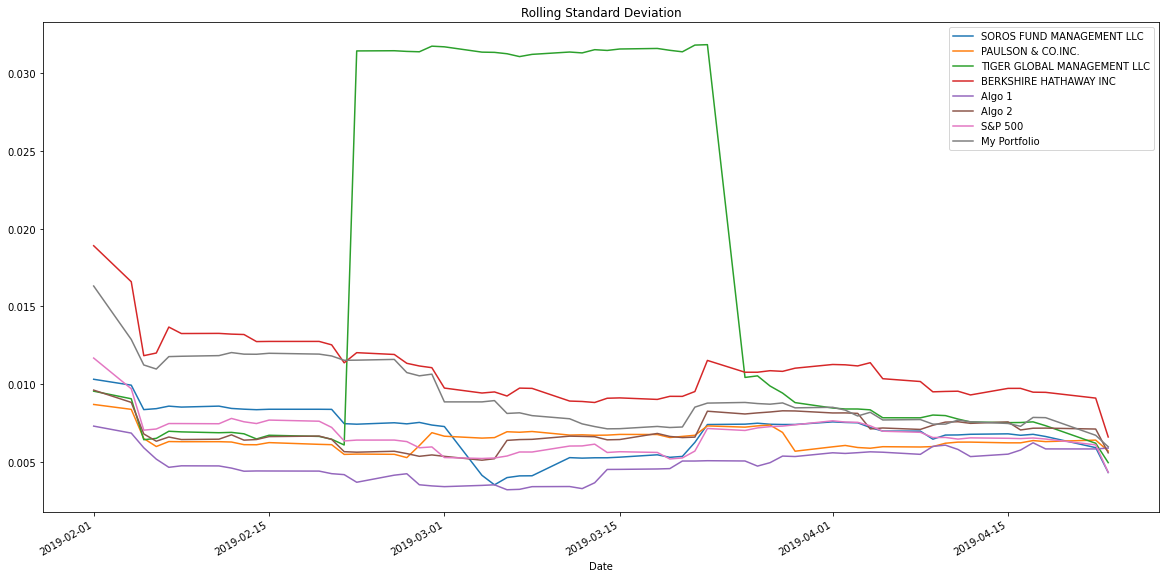

In [82]:
# Rolling
# YOUR CODE HERE
custom_portfolio.rolling(window = 21).std().plot(figsize=(20,10), title = "Rolling Standard Deviation")

In [83]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (custom_portfolio.mean() * 252) / (custom_portfolio.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      4.998934
PAULSON & CO.INC.              2.364248
TIGER GLOBAL MANAGEMENT LLC   -0.384135
BERKSHIRE HATHAWAY INC         4.442098
Algo 1                         3.488488
Algo 2                         5.051608
S&P 500                        4.196678
My Portfolio                   3.736429
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

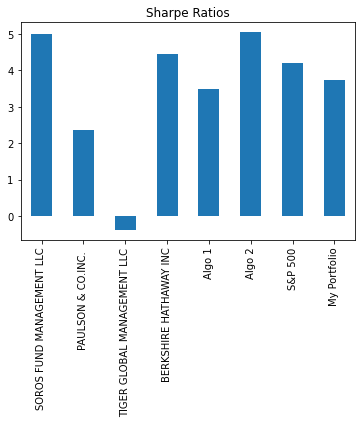

In [84]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios")

In [85]:
# Create a correlation analysis
# YOUR CODE HERE
correlation = custom_portfolio.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.749951,0.356923,0.741391,0.091970,0.807262,0.789750,0.592594
PAULSON & CO.INC.,0.749951,1.000000,0.268720,0.618347,0.147312,0.737247,0.699920,0.519181
TIGER GLOBAL MANAGEMENT LLC,0.356923,0.268720,1.000000,0.135657,0.022687,0.198111,0.248452,0.191979
BERKSHIRE HATHAWAY INC,0.741391,0.618347,0.135657,1.000000,0.166761,0.779560,0.872547,0.765937
Algo 1,0.091970,0.147312,0.022687,0.166761,1.000000,0.118447,0.125966,0.065250
Algo 2,0.807262,0.737247,0.198111,0.779560,0.118447,1.000000,0.877848,0.674030
S&P 500,0.789750,0.699920,0.248452,0.872547,0.125966,0.877848,1.000000,0.807912
My Portfolio,0.592594,0.519181,0.191979,0.765937,0.065250,0.674030,0.807912,1.000000


<AxesSubplot:title={'center':'My Portfolio Rolling Beta'}, xlabel='Date'>

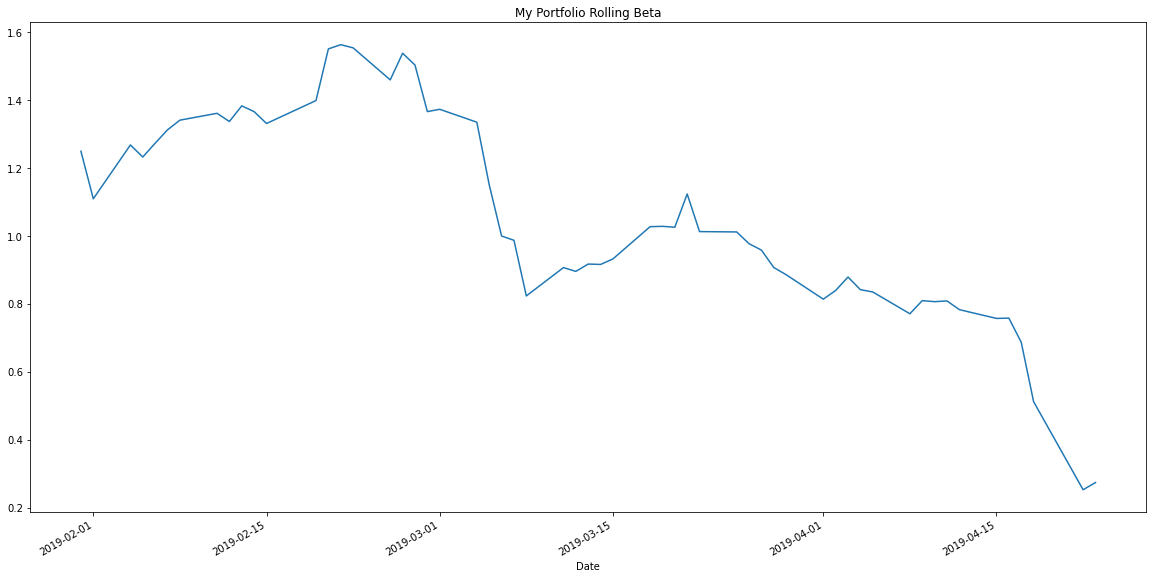

In [87]:
# Beta
# YOUR CODE HERE
my_portfolio_SP500 = pd.concat([my_portfolio, sp500_returns], axis='columns', join='inner')
my_portfolio_SP500.columns = ['My Portfolio', 'S&P 500']
rolling_covariance = my_portfolio_SP500['My Portfolio'].rolling(window=20).cov(my_portfolio_SP500['S&P 500'])
rolling_variance = my_portfolio_SP500['S&P 500'].rolling(window=20).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='My Portfolio Rolling Beta')